In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('hackathon.csv')

In [3]:
df

,Set,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,train,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,No,No
1,train,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,No,No
2,train,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,No,No
3,train,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,No,No
4,train,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,train,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,Yes,No
12326,train,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,Yes,No
12327,train,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,Yes,No
12328,train,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,No,No


In [4]:
df['Revenue'] = df['Revenue'].map({'Yes': 1, 'No': 0})
df['Weekend'] = df['Weekend'].map({'Yes': 1, 'No': 0})

# Checking missing values

In [5]:
df.isnull().mean()

Set                        0.0
Administrative             0.0
Administrative_Duration    0.0
Informational              0.0
Informational_Duration     0.0
ProductRelated             0.0
ProductRelated_Duration    0.0
BounceRates                0.0
ExitRates                  0.0
PageValues                 0.0
SpecialDay                 0.0
Month                      0.0
OperatingSystems           0.0
Browser                    0.0
Region                     0.0
TrafficType                0.0
VisitorType                0.0
Weekend                    0.0
Revenue                    0.0
dtype: float64

# Exploring categorical variables

In [6]:
object_columns = [column for column in df.columns if df[column].dtype == np.dtype('object')]
object_columns

['Set', 'Month', 'VisitorType']

In [7]:
for column in object_columns:
    display(df[column].value_counts())

Set
train    9864
test     2466
Name: count, dtype: int64

Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64

VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64

<font color='red'><b>Question:</b></font> In which month, is "Revenue" most likely abd least likely to be positive, respectively?

In [8]:
df[['Month', 'Revenue']].groupby('Month').mean()

,Revenue
Month,
Aug,0.175520
Dec,0.125072
Feb,0.016304
Jul,0.152778
June,0.100694
Mar,0.100682
May,0.108502
Nov,0.253502
Oct,0.209472


<font color='red'><b>Question:</b></font> For which visitor type, is "Revenue" most likely abd least likely to be positive, respectively?

In [9]:
df[['VisitorType', 'Revenue']].groupby('VisitorType').mean()

,Revenue
VisitorType,
New_Visitor,0.249115
Other,0.188235
Returning_Visitor,0.139323


# Exploring numeric variables

In [10]:
numeric_columns = df.describe().columns[:-1]
numeric_columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend'],
      dtype='object')

<font color='red'><b>Question:</b></font> Is there any variable that shows good linear separability to differentiate "Revenue"? If so, which?

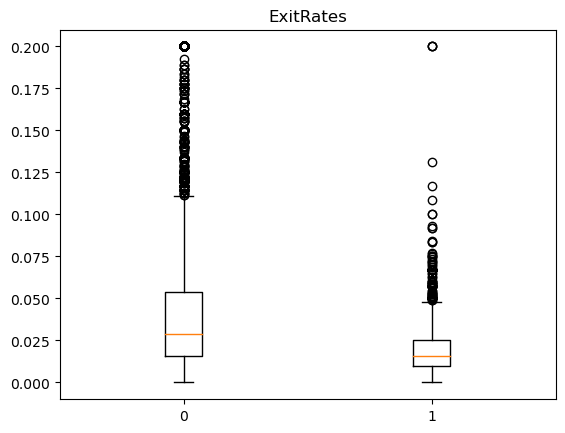

In [11]:
# We can make a conditional box plot for each variable against the label

column = numeric_columns[7]
labels = [0, 1]
y = [df[column][df['Revenue'] == label] for label in labels]

plt.boxplot(y, labels=labels)
plt.title(column)
plt.show()

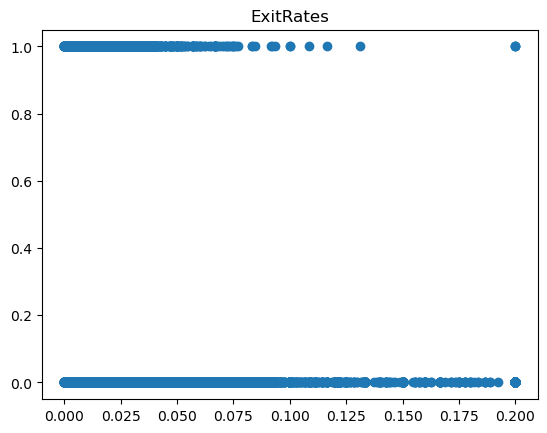

In [12]:
# We can make a conditional box plot for each variable against the label

column = numeric_columns[7]

plt.scatter(df[column], df['Revenue'])
plt.title(column)
plt.show()

# One-hot encoding

In [13]:
from sklearn.preprocessing import OneHotEncoder

In [14]:
raw_column_names = ['Month', 'VisitorType']
raw_columns = df[raw_column_names]

In [15]:
enc = OneHotEncoder(drop='first')
enc.fit(raw_columns)
encoded_columns = enc.transform(raw_columns).toarray()
encoded_column_names = enc.get_feature_names_out()

In [16]:
df[encoded_column_names] = encoded_columns

# Prepare features and label
Use the first 10000 rows as the training set and the remaining rows as the test set

In [17]:
train_df = df[df['Set'] == 'train']
test_df = df[df['Set'] == 'test']

In [18]:
label = 'Revenue'
excluded_features = [label, 'Set'] + raw_column_names
features = [feature for feature in df.columns if feature not in excluded_features]

In [19]:
train_x = train_df[features]
train_y = train_df[label]

test_x = test_df[features]
test_y = test_df[label]

In [20]:
train_x

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12324,0,0.0,1,0.0,16,503.000000,0.000000,0.037647,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


# Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

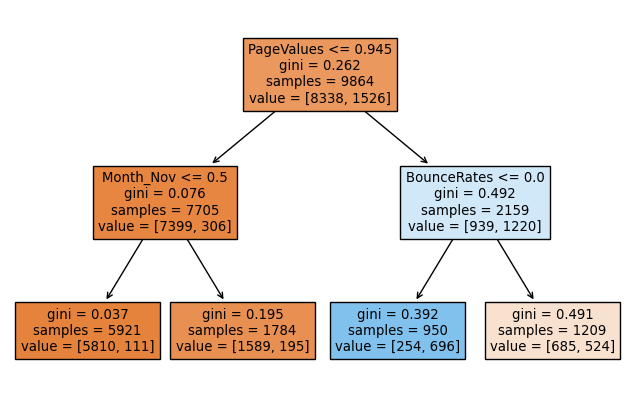

In [22]:
# Build model
model = DecisionTreeClassifier(criterion='gini', max_depth=2, min_samples_split=100)

# Fit model on training data
model.fit(train_x, train_y)

# Visualize the decision tree
feature_names = train_x.columns.tolist()
plt.figure(figsize=(8, 5))
plot_tree(model, filled=True, feature_names=feature_names)
plt.show()

In [23]:
from sklearn.tree import export_text

In [24]:
print(export_text(model, feature_names=feature_names, show_weights=True))

|--- PageValues <= 0.94
|   |--- Month_Nov <= 0.50
|   |   |--- weights: [5810.00, 111.00] class: 0
|   |--- Month_Nov >  0.50
|   |   |--- weights: [1589.00, 195.00] class: 0
|--- PageValues >  0.94
|   |--- BounceRates <= 0.00
|   |   |--- weights: [254.00, 696.00] class: 1
|   |--- BounceRates >  0.00
|   |   |--- weights: [685.00, 524.00] class: 0



In [25]:
train_yhat = model.predict(train_x)
test_yhat = model.predict(test_x)

In [26]:
metrics.f1_score(train_y, train_yhat)

0.5621970920840065

In [27]:
metrics.f1_score(test_y, test_yhat)

0.5614035087719298

In [28]:
dt_f1_df = []

for i in range(1, 16):
    model = DecisionTreeClassifier(criterion='gini', max_depth=i, min_samples_split=200)
    model.fit(train_x, train_y)
    
    train_yhat = model.predict(train_x)
    test_yhat = model.predict(test_x)

    train_f1 = metrics.f1_score(train_y, train_yhat)
    test_f1 = metrics.f1_score(test_y, test_yhat)
    
    dt_f1_df.append([i, train_f1, test_f1])

dt_f1_df = pd.DataFrame(dt_f1_df, columns=['max_depth', 'train_f1', 'test_f1'])
dt_f1_df

,max_depth,train_f1,test_f1
0,1,0.662144,0.666667
1,2,0.562197,0.561404
2,3,0.648705,0.660326
3,4,0.642041,0.644874
4,5,0.684303,0.653576
5,6,0.666667,0.641288
6,7,0.669896,0.639416
7,8,0.675735,0.639885
8,9,0.676222,0.641834
9,10,0.676708,0.639087


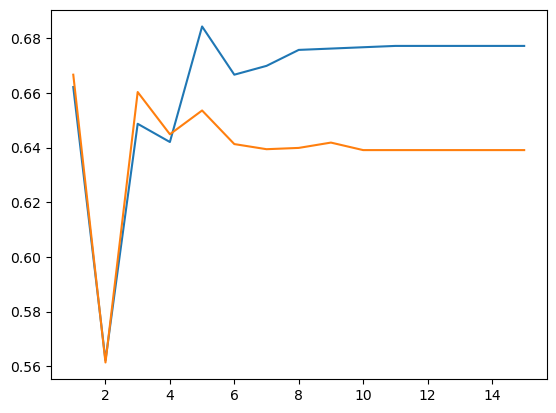

In [29]:
plt.plot(dt_f1_df['max_depth'], dt_f1_df['train_f1'])
plt.plot(dt_f1_df['max_depth'], dt_f1_df['test_f1'])

# k-nearest algorithm

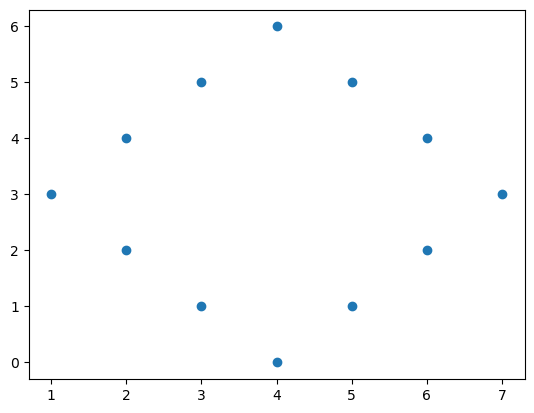

In [30]:
x = [1,2,3,4,5,6,7,6,5,4,3,2]
y = [3,4,5,6,5,4,3,2,1,0,1,2]
plt.scatter(x, y)

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
train_x

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12324,0,0.0,1,0.0,16,503.000000,0.000000,0.037647,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [33]:
from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler()

normalizer.fit(train_x)

train_x_norm = normalizer.transform(train_x)
test_x_norm = normalizer.transform(test_x)

In [34]:
knn_f1_df = []

for k in [5, 7, 9, 15, 25]:
    model1 = KNeighborsClassifier(n_neighbors=k)
    model1.fit(train_x.values, train_y)
    
    train_yhat = model1.predict(train_x.values)
    test_yhat = model1.predict(test_x.values)

    model1_train_f1 = metrics.f1_score(train_y, train_yhat)
    model1_test_f1 = metrics.f1_score(test_y, test_yhat)
    
    model2 = KNeighborsClassifier(n_neighbors=k)
    model2.fit(train_x_norm, train_y)

    train_yhat_norm = model2.predict(train_x_norm)
    test_yhat_norm = model2.predict(test_x_norm)
    
    model2_train_f1 = metrics.f1_score(train_y, train_yhat_norm)
    model2_test_f1 = metrics.f1_score(test_y, test_yhat_norm)

    knn_f1_df.append([k, model1_train_f1, model1_test_f1, model2_train_f1, model2_test_f1])
    
knn_f1_df = pd.DataFrame(knn_f1_df, columns=['k', 'model1_train_f1_score', 'model1_test_f1_score', 'model2_train_f1_score', 'model2_test_f1_score'])
knn_f1_df

,k,model1_train_f1_score,model1_test_f1_score,model2_train_f1_score,model2_test_f1_score
0,5,0.548223,0.399317,0.397954,0.202247
1,7,0.493728,0.365314,0.310553,0.171657
2,9,0.448616,0.346304,0.241489,0.140127
3,15,0.347826,0.311850,0.152513,0.114943
4,25,0.256891,0.268722,0.091575,0.067797


# Naive Bayes

In [35]:
feature_sets = [['PageValues', 'SpecialDay', 'OperatingSystems', 'Region', 'TrafficType'],
                ['Administrative', 'SpecialDay', 'OperatingSystems', 'Region', 'TrafficType'],
                ['Administrative', 'PageValues', 'OperatingSystems', 'Region', 'TrafficType'],
                ['Administrative', 'PageValues', 'SpecialDay', 'Region', 'TrafficType'],
                ['Administrative', 'PageValues', 'SpecialDay', 'OperatingSystems', 'TrafficType'],
                ['Administrative', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Region'],
                ['Administrative', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Region', 'TrafficType'],
               ]

In [36]:
from sklearn.naive_bayes import CategoricalNB

In [37]:
nb_f1_df = []

for i in range(len(feature_sets)):
    feature_set = feature_sets[i]
    
    train_x_nb = train_x[feature_set]
    test_x_nb = test_x[feature_set]
    
    model = CategoricalNB()
    
    model.fit(train_x_nb, train_y)
    
    train_yhat = model.predict(train_x_nb)
    test_yhat = model.predict(test_x_nb)
    
    train_f1 = metrics.f1_score(train_y, train_yhat)
    test_f1 = metrics.f1_score(test_y, test_yhat)
    
    nb_f1_df.append([i+1, train_f1, test_f1])
    
nb_f1_df = pd.DataFrame(nb_f1_df, columns=['Feature Set', 'train_f1', 'test_f1'])
nb_f1_df

,Feature Set,train_f1,test_f1
0,1,0.295280,0.218750
1,2,0.022930,0.000000
2,3,0.339816,0.261053
3,4,0.328327,0.259414
4,5,0.348047,0.267223
5,6,0.259483,0.195122
6,7,0.341339,0.264706


# Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
model = LogisticRegression(max_iter=1000)
model.fit(train_x, train_y)

train_yhat = model.predict(train_x)
test_yhat = model.predict(test_x)

train_f1 = metrics.f1_score(train_y, train_yhat)
test_f1 = metrics.f1_score(test_y, test_yhat)

train_f1, test_f1

D:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.058787507654623386, 0.05339805825242718)

# Best Model

In [40]:
model = DecisionTreeClassifier(criterion='gini', max_depth=1, min_samples_split=200)
model.fit(train_x, train_y)

train_yhat = model.predict(train_x)
test_yhat = model.predict(test_x)

train_f1 = metrics.f1_score(train_y, train_yhat)
test_f1 = metrics.f1_score(test_y, test_yhat)

train_f1, test_f1

(0.6621438263229309, 0.6666666666666666)